In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import os

%load_ext autotime
%matplotlib inline

diri = %pwd
diri

'C:\\Users\\jimpg\\OneDrive\\Documents\\APWS'

In [2]:
# Read City Hourly Air Pollutant Data to a dataframe
AQ_FILE = "Measurement_summary.csv"

def load_data(file=AQ_FILE):
    aq_path = os.path.join("raw_data", file)
    return pd.read_csv(aq_path, na_values=-1)

df = load_data()
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


time: 929 ms


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               643535 non-null  float64
 6   NO2               643677 non-null  float64
 7   O3                643452 non-null  float64
 8   CO                643475 non-null  float64
 9   PM10              643549 non-null  float64
 10  PM2.5             643538 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB
time: 52 ms


In [4]:
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,643535.000000,643677.000000,643452.000000,643475.000000,643549.000000,643538.000000
mean,113.000221,37.553484,126.989340,0.004372,0.028609,0.024400,0.518663,43.983296,25.575054
std,7.211315,0.053273,0.078790,0.007661,0.084109,0.057845,0.388507,71.269173,44.010772
min,101.000000,37.452357,126.835151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.009000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.035000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


time: 140 ms


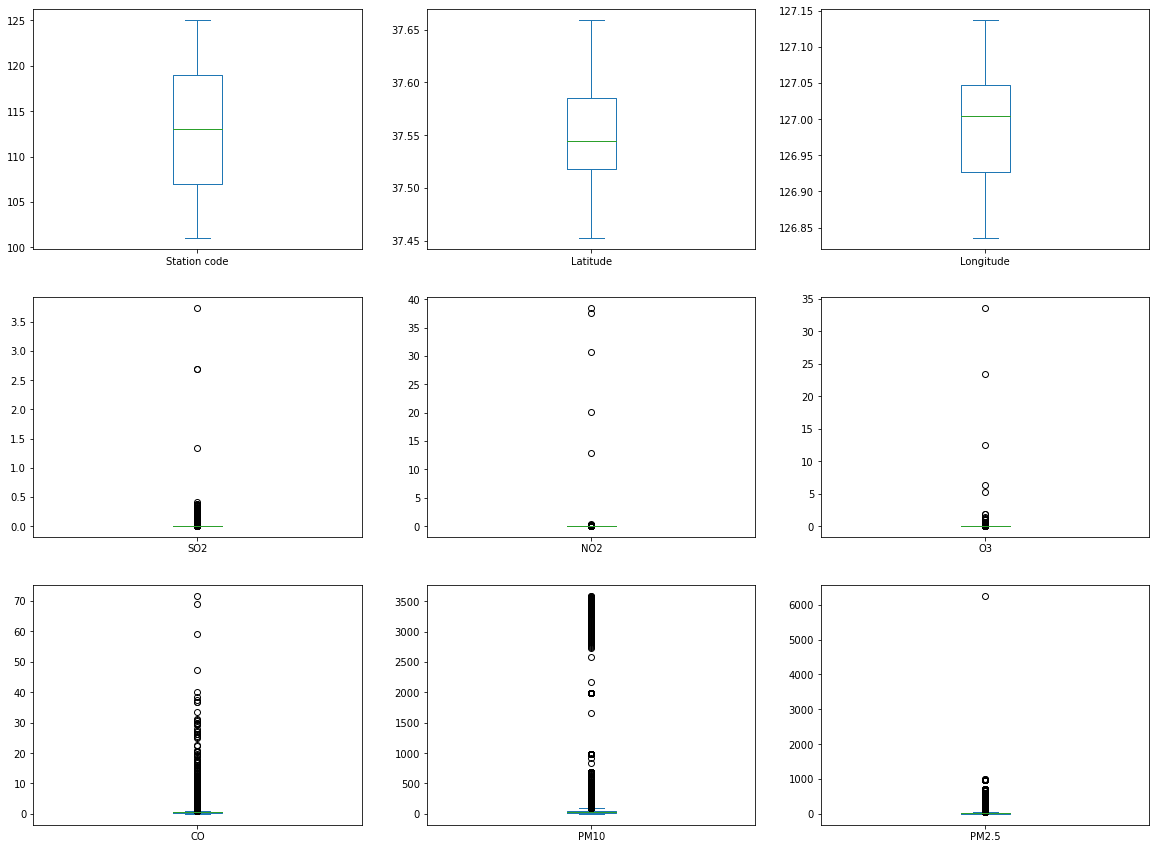

time: 851 ms


In [5]:
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(20,15))
plt.show()

array([[<AxesSubplot:title={'center':'Station code'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM2.5'}>]], dtype=object)

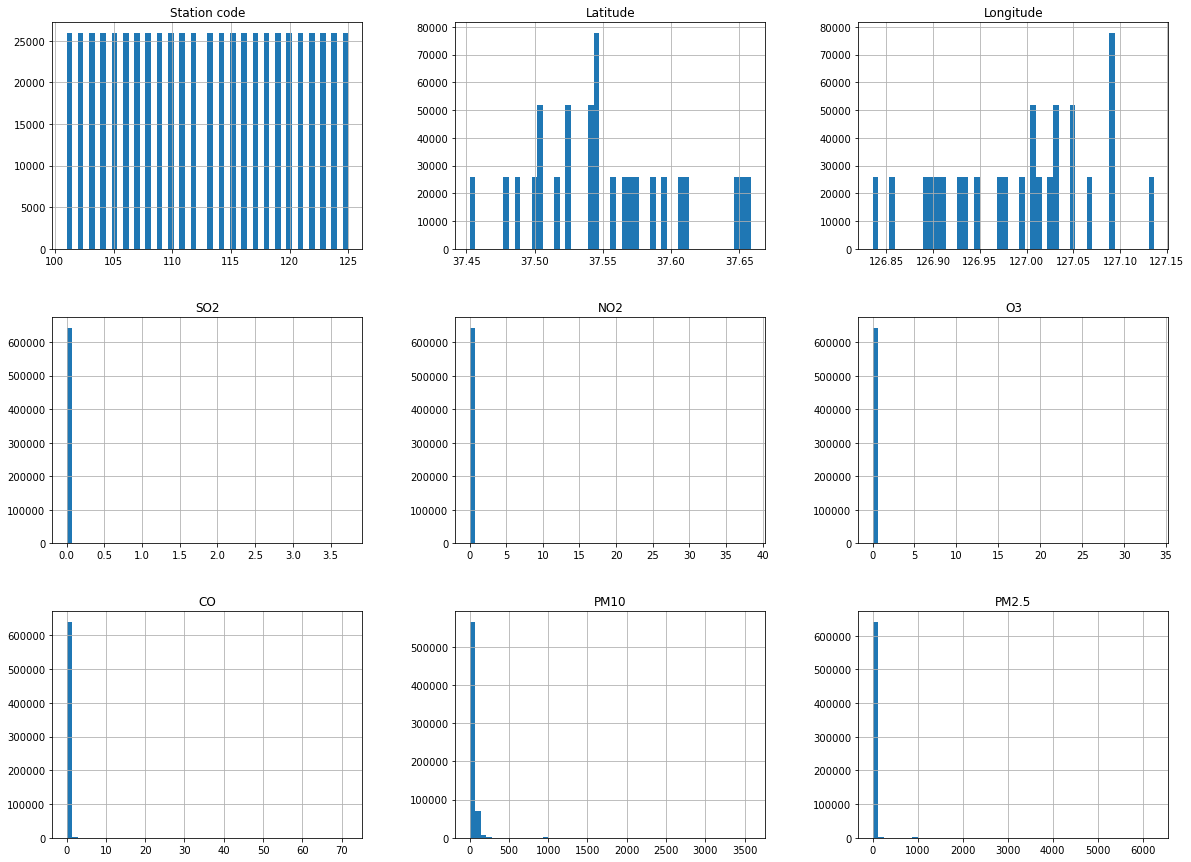

time: 1.18 s


In [6]:
df.hist(bins=50, figsize=(20, 15))

In [7]:
correlations = df.corr()
correlations

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,1.000000,-0.489776,0.047065,0.018499,0.005769,-0.006562,-0.045432,0.029234,0.016563
Latitude,-0.489776,1.000000,0.307581,-0.009904,-0.021663,0.012874,0.062027,-0.021756,-0.022974
Longitude,0.047065,0.307581,1.000000,0.000224,-0.006085,-0.014367,0.031733,-0.023688,-0.019747
SO2,0.018499,-0.009904,0.000224,1.000000,0.732123,0.734805,0.259964,0.044893,0.052191
NO2,0.005769,-0.021663,-0.006085,0.732123,1.000000,0.592600,0.079274,0.033422,0.038461
O3,-0.006562,0.012874,-0.014367,0.734805,0.592600,1.000000,-0.064694,0.003796,-0.001060
CO,-0.045432,0.062027,0.031733,0.259964,0.079274,-0.064694,1.000000,0.144918,0.179321
PM10,0.029234,-0.021756,-0.023688,0.044893,0.033422,0.003796,0.144918,1.000000,0.227764
PM2.5,0.016563,-0.022974,-0.019747,0.052191,0.038461,-0.001060,0.179321,0.227764,1.000000


time: 117 ms


<AxesSubplot:>

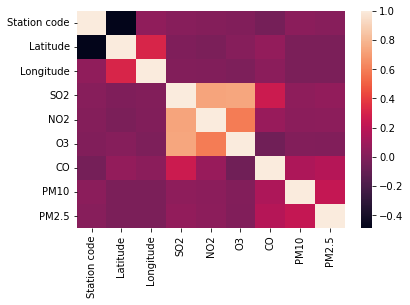

time: 587 ms


In [8]:
import seaborn as sns
sns.heatmap(correlations)

In [9]:
correlations["O3"].sort_values(ascending = False)

O3              1.000000
SO2             0.734805
NO2             0.592600
Latitude        0.012874
PM10            0.003796
PM2.5          -0.001060
Station code   -0.006562
Longitude      -0.014367
CO             -0.064694
Name: O3, dtype: float64

time: 3.01 ms


In [10]:
df.isnull().sum()

Measurement date       0
Station code           0
Address                0
Latitude               0
Longitude              0
SO2                 3976
NO2                 3834
O3                  4059
CO                  4036
PM10                3962
PM2.5               3973
dtype: int64

time: 44.8 ms


Text(0.5, 1.0, 'CO')

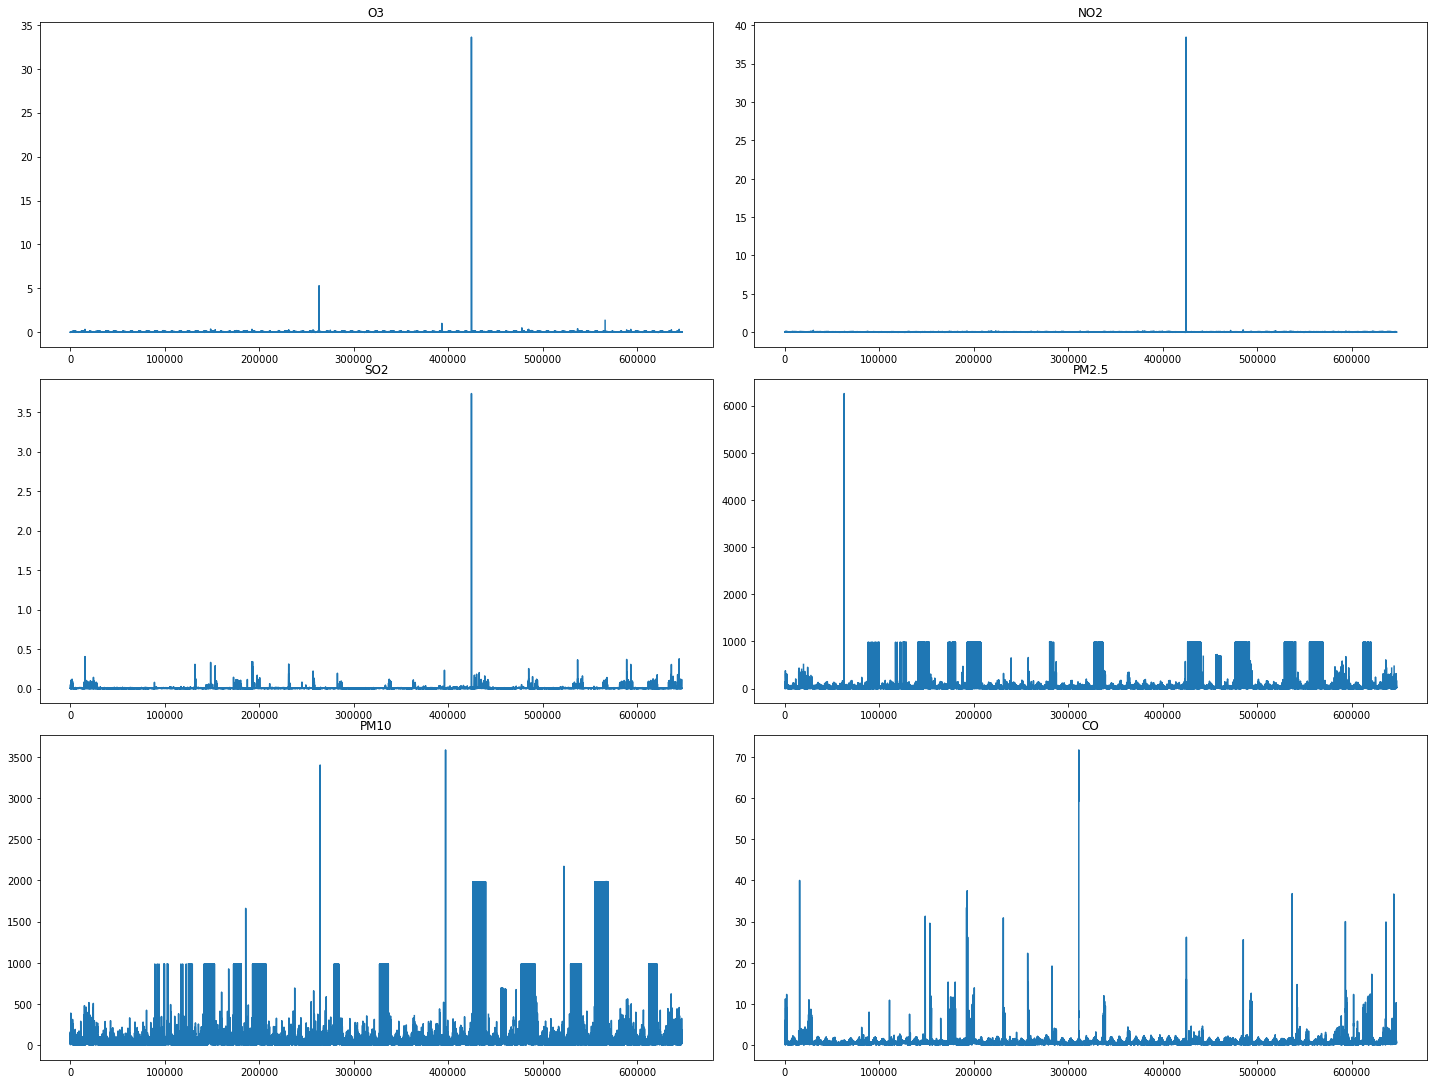

time: 837 ms


In [11]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.tight_layout()

ax[0,0].plot(df["O3"])
ax[0,0].set_title("O3")

ax[1,0].plot(df["SO2"])
ax[1,0].set_title("SO2")

ax[2,0].plot(df["PM10"])
ax[2,0].set_title("PM10")

ax[0,1].plot(df["NO2"])
ax[0,1].set_title("NO2")

ax[1,1].plot(df["PM2.5"])
ax[1,1].set_title("PM2.5")

ax[2,1].plot(df["CO"])
ax[2,1].set_title("CO")

In [12]:
# function to apply to remove outliers
def replace_outliers(x, upper, lower):
    if (x > upper) or (x < lower):
        x = math.nan
    return x
    

for col in df[["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]]:
    # quantiles
    q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q75 - q25
    print(f"{col} Percentiles: 25th: {q25}, 75th: {q75}, IQR: {iqr}")
    
    # calculate the outlier cutoff
    # Extreme tolerance, only want to cut out instrument errors
    cut_off = iqr * 8 
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    print(f"Number Outlier: {len(outliers)}")

    df[col] = df[col].apply(lambda x : replace_outliers(x, upper, lower))

df.isnull().sum()

SO2 Percentiles: 25th: 0.003, 75th: 0.005, IQR: 0.002
Number Outlier: 624
NO2 Percentiles: 25th: 0.016, 75th: 0.038, IQR: 0.022
Number Outlier: 8
O3 Percentiles: 25th: 0.009, 75th: 0.035, IQR: 0.026000000000000002
Number Outlier: 65
CO Percentiles: 25th: 0.3, 75th: 0.6, IQR: 0.3
Number Outlier: 363
PM10 Percentiles: 25th: 22.0, 75th: 53.0, IQR: 31.0
Number Outlier: 1484
PM2.5 Percentiles: 25th: 11.0, 75th: 31.0, IQR: 20.0
Number Outlier: 1221


Measurement date       0
Station code           0
Address                0
Latitude               0
Longitude              0
SO2                 4600
NO2                 3842
O3                  4124
CO                  4399
PM10                5446
PM2.5               5194
dtype: int64

time: 1.81 s


In [13]:
df_interp = df.interpolate(method='nearest')

time: 207 ms


Text(0.5, 1.0, 'CO')

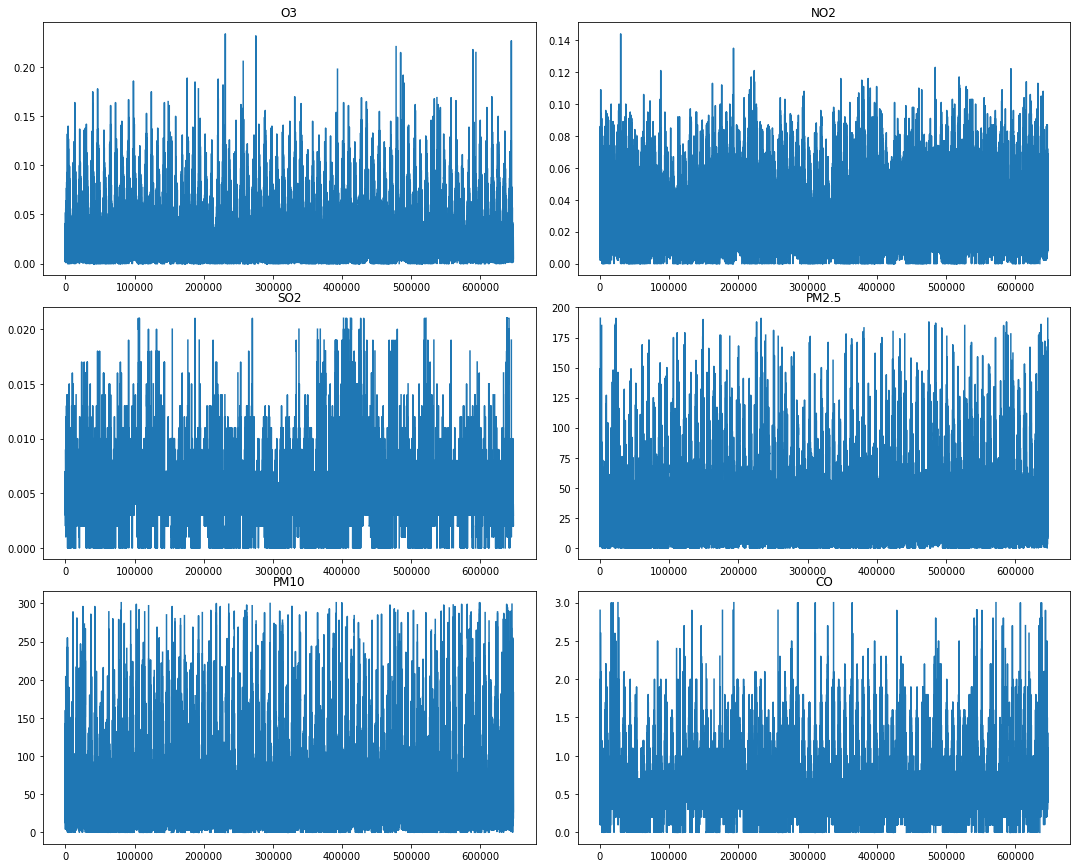

time: 1.09 s


In [14]:
fig, ax = plt.subplots(3, 2, figsize=(15,12))
fig.tight_layout()

ax[0,0].plot(df["O3"])
ax[0,0].set_title("O3")

ax[1,0].plot(df["SO2"])
ax[1,0].set_title("SO2")

ax[2,0].plot(df["PM10"])
ax[2,0].set_title("PM10")

ax[0,1].plot(df["NO2"])
ax[0,1].set_title("NO2")

ax[1,1].plot(df["PM2.5"])
ax[1,1].set_title("PM2.5")

ax[2,1].plot(df["CO"])
ax[2,1].set_title("CO")

In [15]:
# # File Location of NetCFD input
# wx_mumbai_file = "raw_data/mumbai.nc"
# wx_delhi_file = "raw_data/delhi.nc"

# # Read in NetCFD file into a usable dataset
# xr_mumbai = xr.open_dataset(wx_mumbai_file)
# xr_delhi = xr.open_dataset(wx_delhi_file)

Error in callback <function LineWatcher.stop at 0x00000181772B6550> (for post_run_cell):


AssertionError: 

In [16]:
# # Column names in NetCFD
# LATITUDE_NAME = "latitude"
# LONGITUDE_NAME = "longitude"
# TIME_NAME = "time"
# TEMP_NAME = "t2m"
# RAD_NAME = "ssrd"

# target_lat_mumbai = 72.75
# target_lon_mumbai = 19.0

# dataset_lats_mumbai = xr_mumbai[LATITUDE_NAME]
# dataset_lons_mumbai = xr_mumbai[LONGITUDE_NAME]

# lat = xr_mumbai[LATITUDE_NAME][(abs(dataset_lats_mumbai - target_lat_mumbai)).argmin()]
# lon = xr_mumbai[LONGITUDE_NAME][(abs(dataset_lons_mumbai - target_lon_mumbai)).argmin()]

# wx_mumbai = pd.DataFrame()

# wx_mumbai[TIME_NAME] = xr_mumbai[TIME_NAME]
# wx_mumbai[TEMP_NAME] = xr_mumbai[TEMP_NAME].sel(latitude=lat, longitude=lon)
# wx_mumbai[RAD_NAME] =  xr_mumbai[RAD_NAME].sel(latitude=lat, longitude=lon) / 3600

# # # irradiance reported is in joules and is cumulative
# # for idx, time in enumerate(wx_mumbai[TIME_NAME]):
# #     if (time.time().hour != 1) and (time.time().hour != 0):
# #         wx_mumbai[RAD_NAME][idx] -= wx_mumbai[RAD_NAME][idx - 1]
# #     if wx_mumbai[RAD_NAME][idx] < 10e-7:
# #         wx_mumbai[RAD_NAME][idx] = 0
# wx_mumbai.describe()

Error in callback <function LineWatcher.stop at 0x00000181772B6550> (for post_run_cell):


AssertionError: 

In [17]:
# target_lat_delhi = 28.75
# target_lon_delhi = 77.0

# dataset_lats_delhi = xr_delhi[LATITUDE_NAME]
# dataset_lons_delhi = xr_delhi[LONGITUDE_NAME]

# lat = xr_delhi[LATITUDE_NAME][(abs(dataset_lats_delhi - target_lat_delhi)).argmin()]
# lon = xr_delhi[LONGITUDE_NAME][(abs(dataset_lons_delhi - target_lon_delhi)).argmin()]

# wx_delhi = pd.DataFrame()

# wx_delhi[TIME_NAME] = xr_delhi[TIME_NAME]
# wx_delhi[TEMP_NAME] = xr_delhi[TEMP_NAME].sel(latitude=lat, longitude=lon)
# wx_delhi[RAD_NAME] =  xr_delhi[RAD_NAME].sel(latitude=lat, longitude=lon) / 3600

# # # irradiance reported is in joules and is cumulative
# # for idx, time in enumerate(wx_delhi[TIME_NAME]):
# #     if (time.time().hour != 1) and (time.time().hour != 0):
# #         wx_delhi[RAD_NAME][idx] -= wx_delhi[RAD_NAME][idx - 1]
# #     if wx_delhi[RAD_NAME][idx] < 10e-7:
# #         wx_delhi[RAD_NAME][idx] = 0
# wx_delhi.describe()

time: 999 µs


In [18]:
# plt.plot(wx_delhi[RAD_NAME][0:24])

Error in callback <function LineWatcher.stop at 0x00000181772B6550> (for post_run_cell):


AssertionError: 

In [19]:
# df_delhi.to_csv("processed_data/delhi_aq.csv")
# df_mumbai.to_csv("processed_data/mumbai_aq.csv")

time: 1.01 ms
